<a href="https://colab.research.google.com/github/Abdulaziz1607/Challenge_Data/blob/main/QRT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QRT

---

# Reconstruction of Liquid Asset Performance


## Bibli

In [ ]:
import pandas as pd, seaborn as sns, numpy as np, matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
sns.set()
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.covariance import oas
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

In [ ]:
import tensorflow as tf

from keras.models import Sequential
from keras.layers import LSTM,Input, Dense, Conv2D, Concatenate, Dropout, Subtract, \
                        Flatten, MaxPooling2D, Multiply, Lambda, Add, Dot,Minimum
from keras.backend import constant
from keras import optimizers

from keras.engine.topology import Layer
from keras.models import Model
from keras.layers import Input
from keras import initializers
from keras.constraints import max_norm
import keras.backend as K
from keras import regularizers

In [ ]:
cd drive/My Drive/Colab Notebooks/QRT

/content/drive/My Drive/Colab Notebooks/QRT


## Importer les données

In [ ]:
"""
X_train = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")
X_supp = pd.read_csv("supp.csv")
y_train = pd.read_csv("y_train.csv")
"""
X_supp = pd.read_csv("supp.csv")
X_test = pd.read_csv("X_test_clean.csv")
X_test.drop(["Unnamed: 0"],axis=1,inplace=True)
data_all = pd.read_csv("data_all.csv")
data_all.drop(["Unnamed: 0"],axis=1,inplace=True)
data_all["sign"] = data_all["RET_TARGET"].apply(lambda x : np.sign(x) )


## Métric

In [ ]:
def weighted_accuracy(y_test, y_pred):
    y_abs = np.abs(y_test)
    norm = y_abs.sum()
    score = ((np.sign(y_pred) == np.sign(y_test)) * y_abs).sum() / norm
    return score

## Analyse données

In [ ]:
"""
columns = list(data_all["ID_TARGET"].unique())
index = X_train.columns[:-1]
recap = pd.DataFrame(index=index,columns=columns)
for c in columns:
  for i in index:
    x = X_train[X_train["ID_TARGET"]==c]
    recap.loc[i,c] = np.isnan(x[i]).sum()
"""

'\ncolumns = list(data_all["ID_TARGET"].unique())\nindex = X_train.columns[:-1]\nrecap = pd.DataFrame(index=index,columns=columns)\nfor c in columns:\n  for i in index:\n    x = X_train[X_train["ID_TARGET"]==c]\n    recap.loc[i,c] = np.isnan(x[i]).sum()\n'

In [ ]:
#recap.to_csv("recap_train.csv")
recap_train = pd.read_csv("recap_test.csv")
recap_train.index = recap_train["Unnamed: 0"]
recap_train.drop(["Unnamed: 0"],axis=1,inplace=True)
recap_train.drop(["ID","ID_DAY"],inplace=True)

In [ ]:
y_train["sign"] = y_train["RET_TARGET"].apply(lambda x : np.sign(x) )

In [ ]:
"""
columns = list(X_test["ID_TARGET"].unique())
index = X_test.columns[:-1]
recap = pd.DataFrame(index=index,columns=columns)
for c in columns:
  for i in index:
    x = X_test[X_test["ID_TARGET"]==c]
    recap.loc[i,c] = np.isnan(x[i]).sum()
"""

'\ncolumns = list(X_test["ID_TARGET"].unique())\nindex = X_test.columns[:-1]\nrecap = pd.DataFrame(index=index,columns=columns)\nfor c in columns:\n  for i in index:\n    x = X_test[X_test["ID_TARGET"]==c]\n    recap.loc[i,c] = np.isnan(x[i]).sum()\n'

In [ ]:
#recap.to_csv("recap_test.csv")
recap_test = pd.read_csv("recap_test.csv")
recap_test.index = recap_test["Unnamed: 0"]
recap_test.drop(["Unnamed: 0"],axis=1,inplace=True)
recap_test.drop(["ID","ID_DAY"],inplace=True)

In [ ]:
recap_test

,139,129,136,161,217,91,137,8,3,9,131,21,54,130,269,157,249,22,202,132,96,7,178,68,44,196,292,239,279,38,209,207,98,65,51,78,177,231,119,158,...,185,39,272,282,90,52,258,291,152,133,29,274,106,173,33,69,17,189,284,218,183,206,93,16,246,167,1,289,141,109,19,28,251,278,76,241,214,102,145,155
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
RET_216,10,10,10,10,10,9,10,10,10,10,10,8,9,7,10,10,10,7,10,7,10,10,8,10,10,10,10,7,10,10,10,10,10,10,10,10,10,10,10,10,...,10,7,8,10,5,10,7,10,10,10,10,10,10,10,10,10,9,10,10,10,5,10,7,10,10,10,10,10,8,10,10,10,8,10,10,10,10,8,7,10
RET_238,146,144,146,143,141,134,143,146,146,146,145,134,142,146,125,146,137,146,100,143,142,146,143,146,146,146,141,146,146,142,141,145,146,146,146,146,143,146,128,145,...,102,146,142,146,129,137,129,146,146,143,142,142,145,146,146,146,124,146,145,145,146,128,129,142,146,125,146,143,126,143,146,128,146,142,144,78,143,141,141,146
RET_45,2,2,1,1,2,2,2,2,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2,2,2,2,2,0,2,2,2,2,2,2,2,...,2,2,2,2,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2
RET_295,162,162,162,162,162,162,159,161,160,162,162,161,159,162,144,137,162,161,138,162,108,157,162,159,158,162,162,159,162,159,162,162,162,162,162,93,162,162,151,162,...,149,162,162,162,162,162,162,162,162,162,162,158,162,162,135,95,150,157,145,162,162,147,162,162,159,162,113,162,162,162,162,149,161,160,162,88,162,152,162,162
RET_230,9,9,8,8,9,9,9,8,9,7,9,8,9,9,9,9,9,8,9,9,9,9,9,8,9,9,9,9,9,9,9,9,8,9,9,2,9,9,9,9,...,9,9,9,9,9,8,9,8,9,9,9,9,8,9,9,2,9,9,9,8,9,9,9,9,7,9,2,9,9,9,9,9,8,9,9,9,9,9,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RET_281,67,67,67,67,67,67,64,67,67,67,67,66,64,67,61,63,67,67,67,67,57,67,67,67,67,67,64,54,59,47,67,66,67,67,67,65,67,67,63,67,...,67,67,67,66,67,67,67,67,67,67,67,67,62,67,63,59,67,67,47,67,67,65,66,67,66,67,67,67,67,67,67,65,66,67,67,31,67,67,67,67
RET_193,13,10,13,13,6,10,13,10,13,13,9,13,13,13,13,13,11,13,6,9,2,13,7,13,13,9,7,13,13,11,5,6,13,13,12,13,6,13,13,12,...,13,13,7,10,13,13,13,13,13,6,10,11,13,13,13,13,7,11,10,13,13,6,13,8,9,11,13,6,10,11,13,5,13,6,13,4,13,13,13,12
RET_95,66,64,66,66,65,66,66,65,66,66,66,66,66,66,66,66,64,52,66,66,64,66,66,66,66,65,66,66,66,64,64,63,66,66,59,60,65,66,64,66,...,66,66,66,64,66,60,66,66,66,66,66,65,62,66,66,66,63,50,66,66,64,57,66,64,65,66,43,66,66,66,66,64,66,66,66,42,66,66,65,66


In [ ]:
x = data_all[data_all["ID_TARGET"]==239]
p = x[x["sign"]==-1]
print(x.shape)
pd.DataFrame(np.array(np.sum(np.isnan(p)))).T

(2656, 104)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103
0,0,8,197,9,194,16,103,112,4,28,43,24,156,27,10,5,160,18,13,23,114,40,50,65,118,164,88,8,124,18,167,166,49,30,8,29,83,78,100,62,...,26,86,14,52,9,10,123,9,2,71,24,15,97,77,31,51,9,43,21,47,15,50,53,5,160,24,23,104,29,17,16,19,54,22,84,33,96,0,0,0


In [ ]:
x = X_test[X_test["ID_TARGET"]==239]
print(x.shape)
pd.DataFrame(np.array(np.sum(np.isnan(x)))).T

(1135, 103)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102
0,0,0,7,146,2,159,9,80,62,4,32,24,16,107,26,5,3,123,9,4,17,67,26,39,46,94,117,74,6,77,15,119,155,35,15,2,32,50,67,69,...,6,1,29,48,8,33,8,6,89,9,2,45,16,15,75,66,21,33,10,25,14,31,8,28,46,3,141,10,19,78,34,24,15,10,54,13,66,20,66,0


In [ ]:

for i in list(X_train["ID_TARGET"].unique()):
  for c in X_train.columns[2:-1]:
 
    X_train.loc[X_train["ID_TARGET"]==i,c] = X_train.loc[X_train["ID_TARGET"]==i,c].fillna(X_train.loc[X_train["ID_TARGET"]==i,c].mean())


'\nfor i in list(X_train["ID_TARGET"].unique()):\n  for c in X_train.columns[2:-1]:\n \n    X_train.loc[X_train["ID_TARGET"]==i,c] = X_train.loc[X_train["ID_TARGET"]==i,c].fillna(X_train.loc[X_train["ID_TARGET"]==i,c].mean())\n'

In [ ]:
"""
for i in list(X_train["ID_TARGET"].unique()):
  for c in X_train.columns[2:-1]:
 
    X_train.loc[X_train["ID_TARGET"]==i,c] = X_train.loc[X_train["ID_TARGET"]==i,c].fillna(np.random.randn()*0.01)
"""

In [ ]:
"""
for i in list(X_test["ID_TARGET"].unique()):
  for c in X_train.columns[2:-1]:
 
    X_test.loc[X_test["ID_TARGET"]==i,c] = X_test.loc[X_test["ID_TARGET"]==i,c].fillna(X_test.loc[X_test["ID_TARGET"]==i,c].mean())
"""

'\nfor i in list(X_test["ID_TARGET"].unique()):\n  for c in X_train.columns[2:-1]:\n \n    X_test.loc[X_test["ID_TARGET"]==i,c] = X_test.loc[X_test["ID_TARGET"]==i,c].fillna(X_test.loc[X_test["ID_TARGET"]==i,c].mean())\n'

In [ ]:
"""
for i in list(X_test["ID_TARGET"].unique()):
  for c in X_train.columns[2:-1]:
 
    X_test.loc[X_test["ID_TARGET"]==i,c] = X_test.loc[X_test["ID_TARGET"]==i,c].fillna(np.random.randn()*0.01)
"""

In [ ]:
"""
data_all = pd.concat([X_train,y_train],axis=1)
data_all.drop(["ID"],axis=1,inplace=True)
"""

In [ ]:
#data_all.to_csv("data_all_random.csv")

In [ ]:
#X_test.to_csv("X_test_clean_random.csv")

##  Liquid Asset

### Analyse

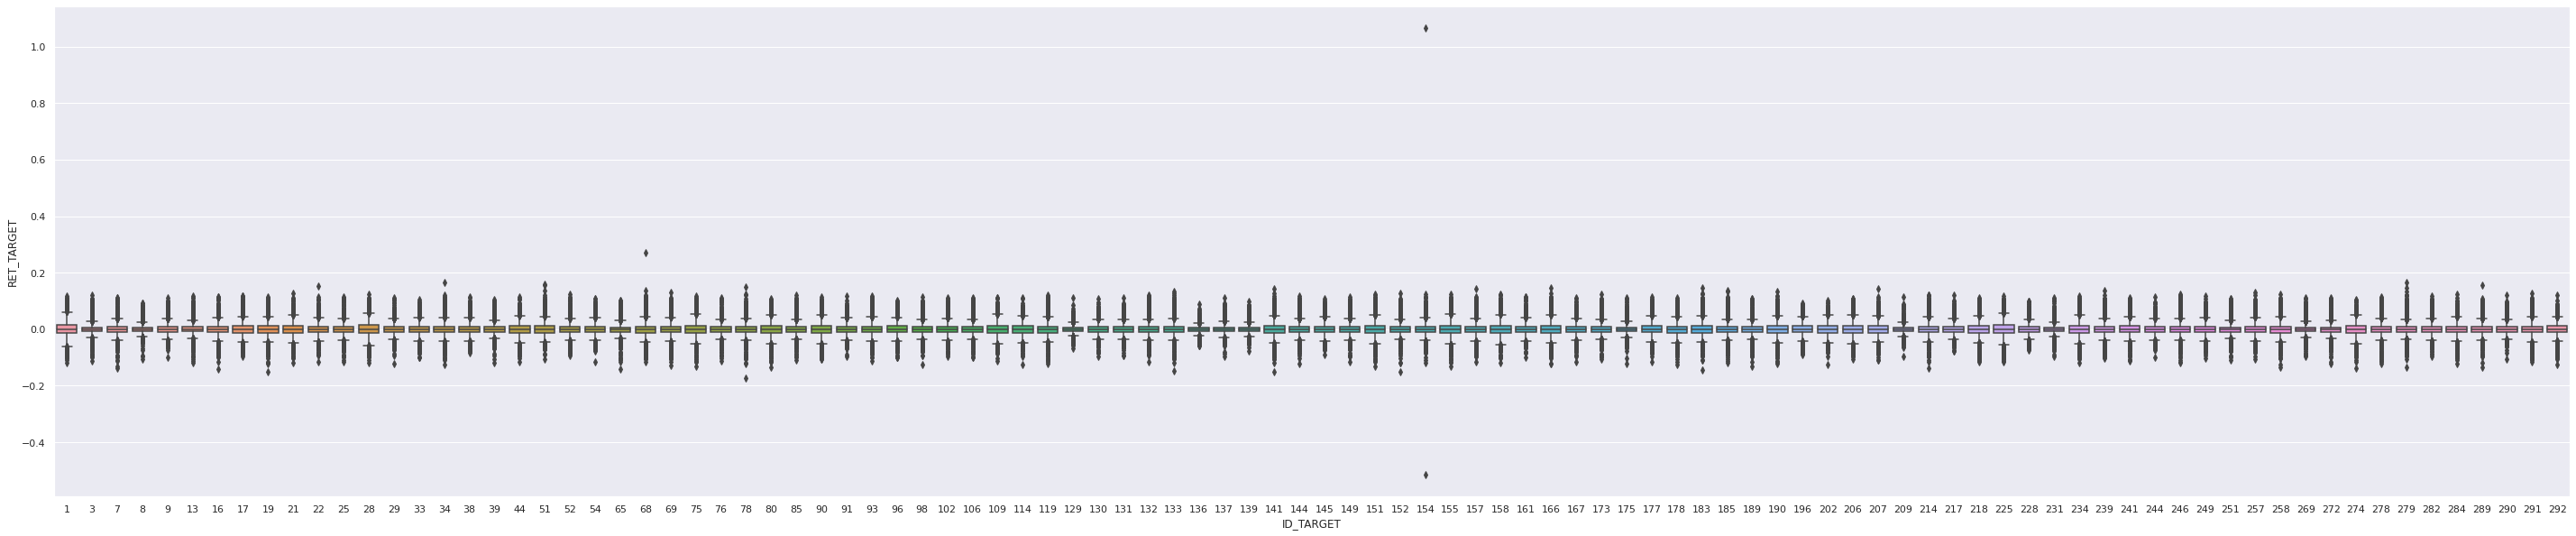

In [ ]:
fig = plt.figure(figsize=(50,10))
sns.boxplot(x="ID_TARGET",y="RET_TARGET",data=data_all)

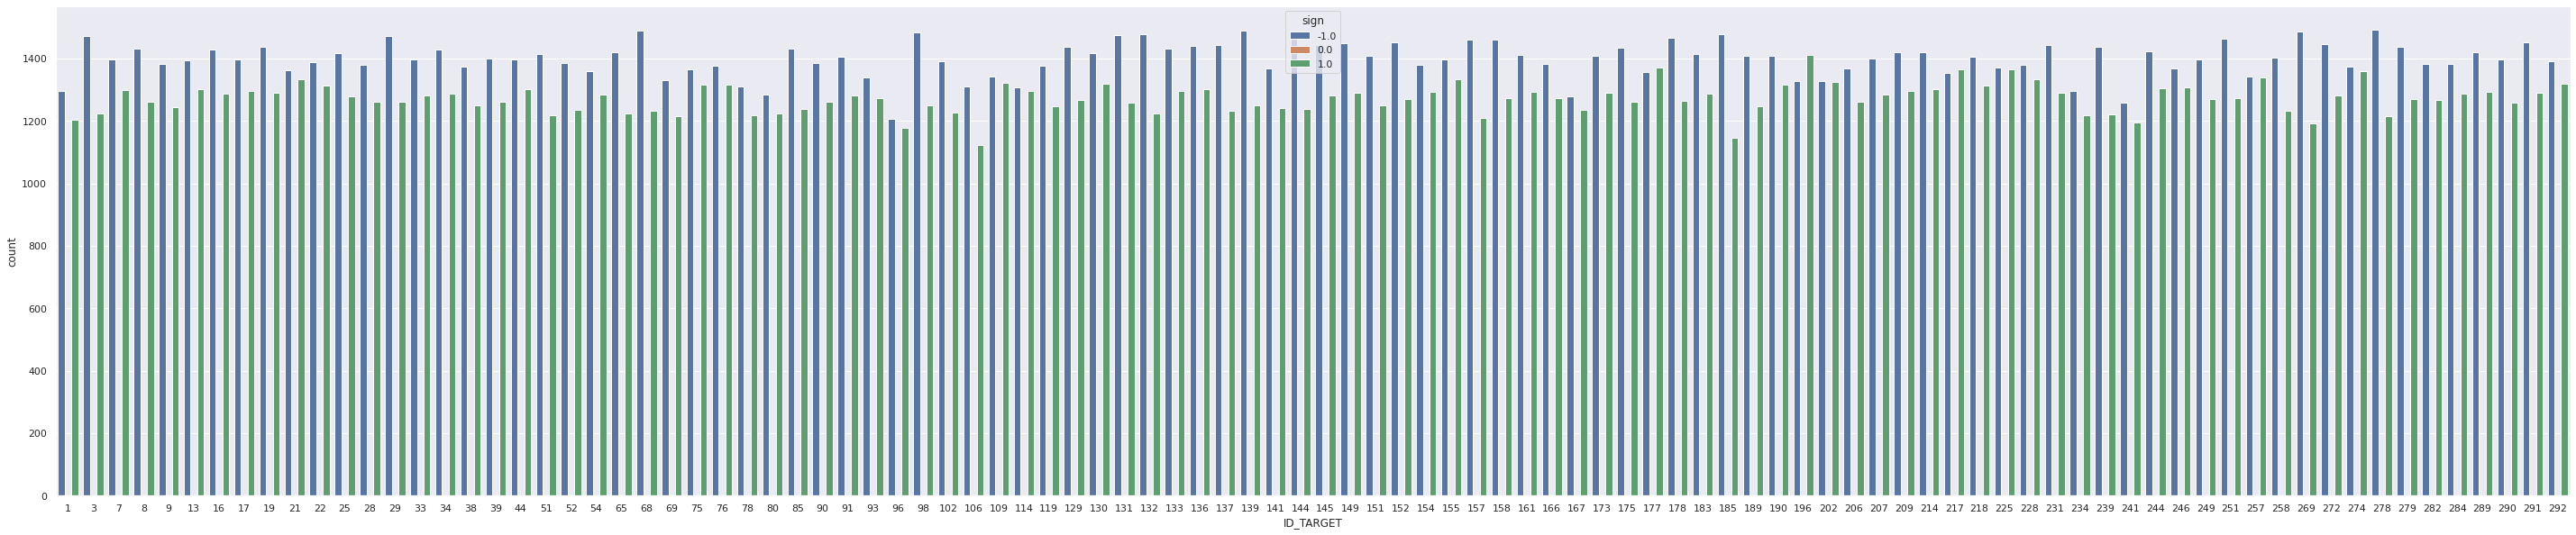

In [ ]:
fig = plt.figure(figsize=(50,10))
sns.countplot(x="ID_TARGET",hue="sign",data=data_all)

In [ ]:
print("nombre de return négatif {}".format(int(data_all[data_all["sign"]==-1]["sign"].sum()*-1)))
print("nombre de return positif {}".format(int(data_all[data_all["sign"]==1]["sign"].sum())))

nombre de return négatif 139960
nombre de return positif 127136


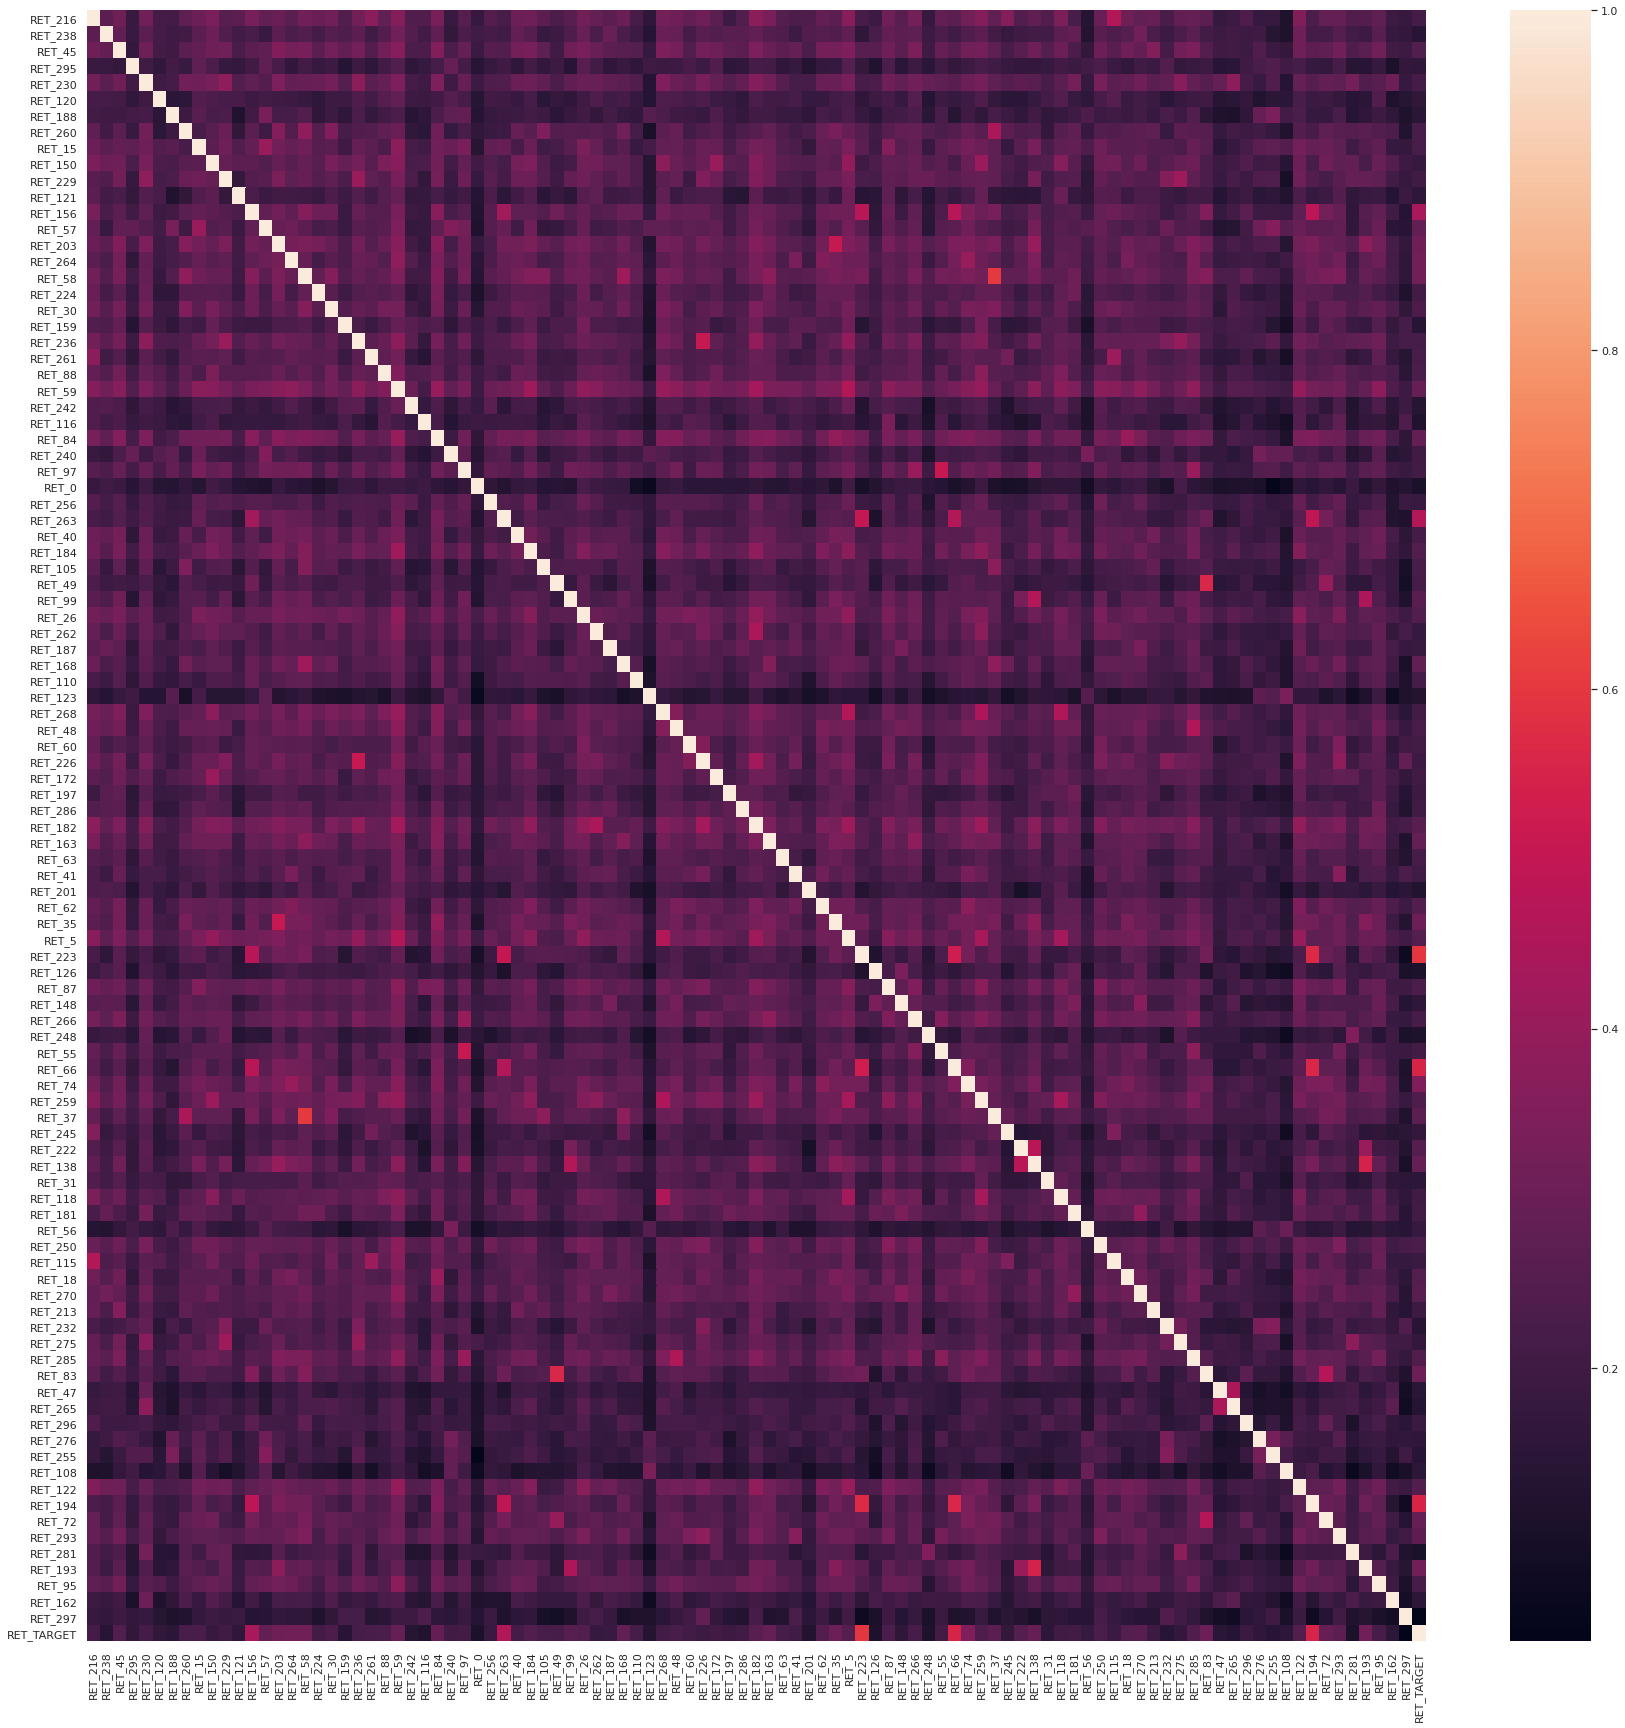

In [ ]:
fig = plt.figure(figsize=(30,30))
id = list(data_all["ID_TARGET"].unique())
liquid_1 = data_all[data_all["ID_TARGET"]==272]
cor = liquid_1.drop(["ID_DAY","ID_TARGET","sign"],axis=1).corr()
sns.heatmap(cor)

In [ ]:
cor

,RET_216,RET_238,RET_45,RET_295,RET_230,RET_120,RET_188,RET_260,RET_15,RET_150,RET_229,RET_121,RET_156,RET_57,RET_203,RET_264,RET_58,RET_224,RET_30,RET_159,RET_236,RET_261,RET_88,RET_59,RET_242,RET_116,RET_84,RET_240,RET_97,RET_0,RET_256,RET_263,RET_40,RET_184,RET_105,RET_49,RET_99,RET_26,RET_262,RET_187,...,RET_148,RET_266,RET_248,RET_55,RET_66,RET_74,RET_259,RET_37,RET_245,RET_222,RET_138,RET_31,RET_118,RET_181,RET_56,RET_250,RET_115,RET_18,RET_270,RET_213,RET_232,RET_275,RET_285,RET_83,RET_47,RET_265,RET_296,RET_276,RET_255,RET_108,RET_122,RET_194,RET_72,RET_293,RET_281,RET_193,RET_95,RET_162,RET_297,RET_TARGET
RET_216,1.000000,0.271637,0.307783,0.182334,0.313780,0.215289,0.208577,0.279291,0.302486,0.336340,0.260150,0.269406,0.329979,0.282105,0.299643,0.265984,0.314747,0.299644,0.318548,0.244903,0.313827,0.374957,0.281084,0.360874,0.240011,0.239572,0.331693,0.184631,0.253384,0.181626,0.246418,0.220129,0.302965,0.310719,0.269798,0.232676,0.263618,0.318942,0.290340,0.268434,...,0.263910,0.322053,0.181041,0.282383,0.267560,0.316393,0.360688,0.282126,0.355768,0.241873,0.275694,0.238459,0.340482,0.225579,0.136508,0.295479,0.463204,0.308334,0.281817,0.294266,0.224934,0.283258,0.287416,0.267826,0.176227,0.190716,0.237123,0.177471,0.178837,0.117664,0.351093,0.228639,0.287507,0.286845,0.240117,0.247392,0.276043,0.196661,0.181199,0.212447
RET_238,0.271637,1.000000,0.283548,0.185026,0.266605,0.214023,0.197205,0.204818,0.267657,0.303812,0.241202,0.209209,0.225946,0.184179,0.269422,0.227079,0.244336,0.212958,0.256208,0.236910,0.268700,0.200709,0.247330,0.314419,0.246160,0.210553,0.275895,0.166737,0.230917,0.202058,0.215412,0.203853,0.284385,0.253523,0.178346,0.190751,0.236032,0.295883,0.230036,0.296511,...,0.269240,0.274322,0.194813,0.228944,0.200825,0.239714,0.269122,0.211568,0.180687,0.199163,0.211350,0.209408,0.268166,0.284562,0.132060,0.261928,0.237739,0.249848,0.314214,0.226941,0.189915,0.228819,0.267469,0.209017,0.192358,0.207061,0.191624,0.197328,0.140382,0.115456,0.308350,0.212807,0.215500,0.256675,0.208962,0.190114,0.259374,0.181190,0.168248,0.142248
RET_45,0.307783,0.283548,1.000000,0.173430,0.308536,0.209725,0.197195,0.266251,0.283171,0.306902,0.313176,0.223363,0.269301,0.276651,0.351425,0.321575,0.331530,0.264889,0.323619,0.284128,0.322096,0.249088,0.315015,0.365556,0.233102,0.232561,0.354766,0.227795,0.289453,0.189133,0.253417,0.244382,0.325673,0.331522,0.275221,0.201421,0.305660,0.328351,0.295671,0.269787,...,0.267369,0.340907,0.198327,0.290876,0.261641,0.318246,0.324826,0.274550,0.219934,0.263821,0.305760,0.251545,0.302423,0.232655,0.169332,0.302366,0.260930,0.307499,0.286596,0.355152,0.211864,0.315866,0.335722,0.248134,0.198636,0.205639,0.196617,0.240035,0.188213,0.167152,0.305727,0.270614,0.276486,0.315669,0.235793,0.265339,0.316489,0.207724,0.191909,0.244472
RET_295,0.182334,0.185026,0.173430,1.000000,0.203754,0.162993,0.209089,0.182523,0.272446,0.229378,0.174528,0.172596,0.205717,0.277604,0.220670,0.165082,0.208300,0.180625,0.192475,0.134503,0.193503,0.158180,0.208252,0.242314,0.160025,0.177090,0.217666,0.292262,0.214980,0.140881,0.175979,0.199611,0.157172,0.208542,0.168039,0.190392,0.140655,0.263092,0.210490,0.161524,...,0.145164,0.192240,0.145420,0.202617,0.169856,0.193566,0.217578,0.200513,0.178119,0.168669,0.169056,0.175387,0.206852,0.186648,0.210057,0.229090,0.189137,0.166289,0.201051,0.186389,0.243607,0.172657,0.184930,0.189284,0.142504,0.144451,0.199829,0.224214,0.241701,0.206821,0.216984,0.175853,0.172448,0.216551,0.138950,0.143478,0.176764,0.109469,0.166708,0.163333
RET_230,0.313780,0.266605,0.308536,0.203754,1.000000,0.199230,0.213764,0.314488,0.312941,0.330272,0.381096,0.242694,0.275438,0.248998,0.343692,0.284831,0.293661,0.295066,0.321843,0.252445,0.369969,0.265557,0.289132,0.344023,0.214905,0.197246,0.344961,0.198351,0.291182,0.191049,0.237916,0.239789,0.301796,0.304086,0.276146,0.229638,0.276507,0.294925,0.295735,0.279024,...,0.282816,0.316233,0.289176,0.272087,0.257318,0.302533,0.327845,0.275009,0.24876

In [ ]:
features = liquid_1.drop(["ID_DAY","ID_TARGET","sign"],axis=1).columns
cov = pd.DataFrame(oas(liquid_1.drop(["ID_DAY","ID_TARGET","sign"],axis=1))[0], index=features, columns=features)
beta = cov / np.diag(cov)
beta

,RET_216,RET_238,RET_45,RET_295,RET_230,RET_120,RET_188,RET_260,RET_15,RET_150,RET_229,RET_121,RET_156,RET_57,RET_203,RET_264,RET_58,RET_224,RET_30,RET_159,RET_236,RET_261,RET_88,RET_59,RET_242,RET_116,RET_84,RET_240,RET_97,RET_0,RET_256,RET_263,RET_40,RET_184,RET_105,RET_49,RET_99,RET_26,RET_262,RET_187,...,RET_148,RET_266,RET_248,RET_55,RET_66,RET_74,RET_259,RET_37,RET_245,RET_222,RET_138,RET_31,RET_118,RET_181,RET_56,RET_250,RET_115,RET_18,RET_270,RET_213,RET_232,RET_275,RET_285,RET_83,RET_47,RET_265,RET_296,RET_276,RET_255,RET_108,RET_122,RET_194,RET_72,RET_293,RET_281,RET_193,RET_95,RET_162,RET_297,RET_TARGET
RET_216,1.000000,0.279426,0.349554,0.191863,0.382223,0.258621,0.232364,0.365690,0.339357,0.328951,0.331433,0.264166,0.378137,0.358631,0.429906,0.355178,0.387847,0.318407,0.335777,0.265791,0.355111,0.354776,0.271985,0.413547,0.289783,0.256665,0.385670,0.223869,0.263907,0.227417,0.280153,0.257998,0.381460,0.338461,0.324325,0.248727,0.420643,0.407459,0.263541,0.297020,...,0.315283,0.372192,0.218738,0.295223,0.327433,0.413974,0.364174,0.375519,0.365127,0.357262,0.469838,0.245425,0.323025,0.260399,0.150354,0.328246,0.451259,0.385730,0.301934,0.348096,0.255367,0.356739,0.314350,0.284160,0.181317,0.226333,0.254126,0.218204,0.195063,0.134773,0.393633,0.297091,0.310904,0.370267,0.297106,0.440349,0.351396,0.204362,0.216407,0.249228
RET_238,0.258976,1.000000,0.312071,0.191683,0.316510,0.244264,0.212116,0.258938,0.289006,0.286931,0.291094,0.198624,0.251971,0.225326,0.376302,0.296460,0.294649,0.219746,0.260055,0.248088,0.291789,0.185088,0.235549,0.347886,0.290679,0.220796,0.318076,0.199085,0.229651,0.253330,0.238570,0.239652,0.349771,0.269312,0.205278,0.197642,0.360616,0.368796,0.201896,0.322737,...,0.303821,0.308523,0.226778,0.231918,0.235795,0.303124,0.262720,0.275785,0.177078,0.285237,0.344641,0.208102,0.245267,0.321904,0.142616,0.284037,0.223477,0.301396,0.324285,0.258298,0.206796,0.274358,0.285716,0.220475,0.193996,0.237876,0.199931,0.237989,0.149013,0.122489,0.335289,0.272531,0.226131,0.322827,0.247845,0.321887,0.318121,0.179919,0.194825,0.224985
RET_45,0.267888,0.258049,1.000000,0.162666,0.331423,0.218138,0.196191,0.307108,0.279463,0.263987,0.345785,0.190465,0.269168,0.312827,0.448120,0.380618,0.361747,0.247302,0.297895,0.272996,0.313080,0.208243,0.267809,0.367009,0.244962,0.221875,0.365448,0.245437,0.265609,0.217465,0.253929,0.258153,0.364520,0.320746,0.289832,0.187464,0.428586,0.367196,0.236536,0.265093,...,0.279355,0.349844,0.211247,0.269852,0.281086,0.365869,0.284742,0.325924,0.201411,0.347316,0.457877,0.228346,0.249939,0.238001,0.165579,0.296893,0.221681,0.341904,0.270519,0.369420,0.215245,0.350243,0.324540,0.231041,0.181296,0.216123,0.184445,0.257680,0.178901,0.164703,0.301384,0.313767,0.265015,0.358838,0.256002,0.413243,0.352454,0.190874,0.198249,0.232696
RET_295,0.159101,0.171503,0.176010,1.000000,0.223223,0.174984,0.214314,0.211503,0.278029,0.202008,0.190548,0.150446,0.210287,0.324536,0.286926,0.198044,0.230499,0.168823,0.183079,0.124077,0.191972,0.131533,0.182386,0.249329,0.172309,0.170351,0.223328,0.330780,0.197955,0.162087,0.178675,0.213271,0.173521,0.204493,0.179116,0.185104,0.198133,0.305004,0.170052,0.159217,...,0.155985,0.198433,0.162801,0.187802,0.192057,0.229643,0.195825,0.237420,0.164189,0.227130,0.255385,0.162533,0.174975,0.192805,0.217434,0.230884,0.164686,0.186129,0.191664,0.197342,0.252271,0.195603,0.180639,0.178699,0.133010,0.150444,0.196318,0.250279,0.238837,0.211279,0.219166,0.201779,0.166054,0.252935,0.156425,0.227777,0.201779,0.100217,0.176185,0.253891
RET_230,0.245943,0.219742,0.278267,0.173212,1.000000,0.185760,0.193314,0.331379,0.280300,0.256746,0.383971,0.188966,0.251237,0.253597,0.397076,0.306909,0.292504,0.249746,0.267739,0.218341,0.334338,0.202975,0.224975,0.316082,0.204136,0.168237,0.325027,0.193687,0.242328,0.202570,0.214924,0.225633,0.302961,0.266011,0.261319,0.189355,0.352265,0.302220,0.215910,0.246029,...,0.270620,0.297684,0.286576,0.228563,0.249384,0.315321,0.261653,0.301538,0.20479

In [ ]:
liquid_1 = data_all[data_all["ID_TARGET"]==239]
cor = liquid_1.drop(["ID_DAY","ID_TARGET","sign"],axis=1).corr()
p = cor["RET_TARGET"]
N=10
ind = p.sort_values()[-N-1:-1]
ind

RET_5      0.276292
RET_57     0.294275
RET_182    0.302140
RET_226    0.307784
RET_229    0.307798
RET_236    0.321058
RET_275    0.325524
RET_276    0.336414
RET_255    0.372533
RET_232    0.641078
Name: RET_TARGET, dtype: float64

In [ ]:
p = beta["RET_TARGET"]
N=10
ind = p.sort_values()[-N-1:-1]
ind

RET_150    0.304826
RET_259    0.305301
RET_262    0.307721
RET_275    0.309098
RET_182    0.309483
RET_172    0.315022
RET_276    0.321369
RET_236    0.344484
RET_255    0.411492
RET_232    0.675769
Name: RET_TARGET, dtype: float64

### Analyse 2 : supp file

In [ ]:
class_1 = X_supp[["ID_asset","CLASS_LEVEL_1"]]

In [ ]:
"""
data_supp = data_all.copy()
data_supp["CLASS_LEVEL_1"] = 0
for i in range(data_supp.shape[0]):
  data_supp.loc[i,"CLASS_LEVEL_1"] = class_1.loc[class_1["ID_asset"]==data_supp.loc[i,"ID_TARGET"],"CLASS_LEVEL_1"].mean()
"""

'\ndata_supp = data_all.copy()\ndata_supp["CLASS_LEVEL_1"] = 0\nfor i in range(data_supp.shape[0]):\n  data_supp.loc[i,"CLASS_LEVEL_1"] = class_1.loc[class_1["ID_asset"]==data_supp.loc[i,"ID_TARGET"],"CLASS_LEVEL_1"].mean()\n'

In [ ]:
#data_supp.to_csv("data_supp.csv")

In [ ]:
data_supp = pd.read_csv("data_supp.csv")

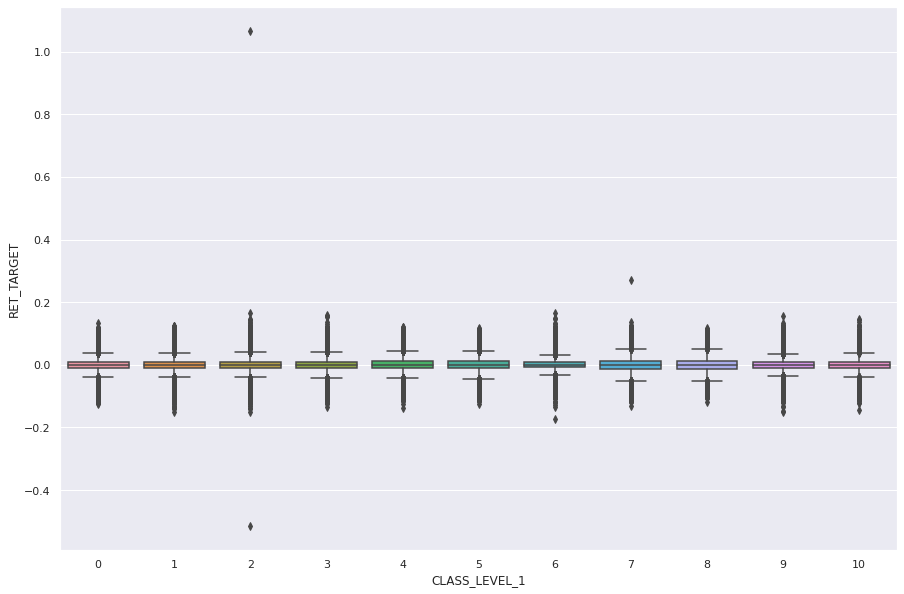

In [ ]:
fig = plt.figure(figsize=(15,10))
sns.boxplot(x="CLASS_LEVEL_1",y="RET_TARGET",data=data_supp)

In [ ]:
data_supp.drop(["Unnamed: 0"],axis=1,inplace=True)

In [ ]:
#data_all = data_supp

### 100 Modele pour chaque asset liquid  

In [ ]:
data_all.head(2)

,ID_DAY,RET_216,RET_238,RET_45,RET_295,RET_230,RET_120,RET_188,RET_260,RET_15,RET_150,RET_229,RET_121,RET_156,RET_57,RET_203,RET_264,RET_58,RET_224,RET_30,RET_159,RET_236,RET_261,RET_88,RET_59,RET_242,RET_116,RET_84,RET_240,RET_97,RET_0,RET_256,RET_263,RET_40,RET_184,RET_105,RET_49,RET_99,RET_26,RET_262,...,RET_248,RET_55,RET_66,RET_74,RET_259,RET_37,RET_245,RET_222,RET_138,RET_31,RET_118,RET_181,RET_56,RET_250,RET_115,RET_18,RET_270,RET_213,RET_232,RET_275,RET_285,RET_83,RET_47,RET_265,RET_296,RET_276,RET_255,RET_108,RET_122,RET_194,RET_72,RET_293,RET_281,RET_193,RET_95,RET_162,RET_297,ID_TARGET,RET_TARGET,sign
0,3316,0.004024,0.009237,0.004967,0.000729,0.01704,0.013885,0.041885,0.015207,-0.003143,0.018565,0.036312,0.002578,0.011782,0.009404,-0.024951,-0.005493,0.005786,0.005735,0.017187,0.040789,-0.006751,-0.013486,0.027113,0.007006,0.019158,0.012076,-0.006246,0.008563,-0.002689,-0.016501,0.029601,0.003583,0.031596,-0.022133,0.000304,-0.010627,0.023026,0.011139,0.037835,...,0.011586,-0.025717,0.001288,0.002289,0.033634,0.008878,0.008791,0.003914,-0.016817,0.018493,0.008937,-0.000624,0.032366,0.022977,0.021104,0.019672,0.004575,0.004258,0.00373,0.017005,-0.004232,0.032986,0.014069,0.026423,0.016533,0.011942,0.008573,0.027374,0.007596,0.01501,0.014733,-0.000476,0.006539,-0.010233,0.001251,-0.003102,-0.094847,139,-0.022351,-1.0
1,3316,0.004024,0.009237,0.004967,0.000799,0.01704,0.013885,0.041885,0.015207,-0.003143,0.018565,0.036312,0.002578,0.011782,0.009404,-0.024951,-0.005493,0.005786,0.005735,0.017187,0.040789,-0.006751,-0.013486,0.027113,0.007006,0.019158,0.012076,-0.006246,0.008563,-0.002689,-0.016501,0.029601,0.003583,0.031596,-0.022133,0.000297,-0.010627,0.023026,0.011139,0.037835,...,0.011586,-0.025717,0.001288,0.002289,0.033634,0.008878,0.008791,0.003914,-0.016817,0.018493,0.008937,-0.000624,0.032366,0.022977,0.021104,0.019672,0.004575,0.004258,0.00373,0.017005,-0.004232,0.032986,0.014069,0.026423,0.016533,0.011942,0.008573,0.027374,0.007596,0.01501,0.014733,-0.000476,0.006539,-0.010233,0.001251,-0.003102,-0.094847,129,-0.011892,-1.0


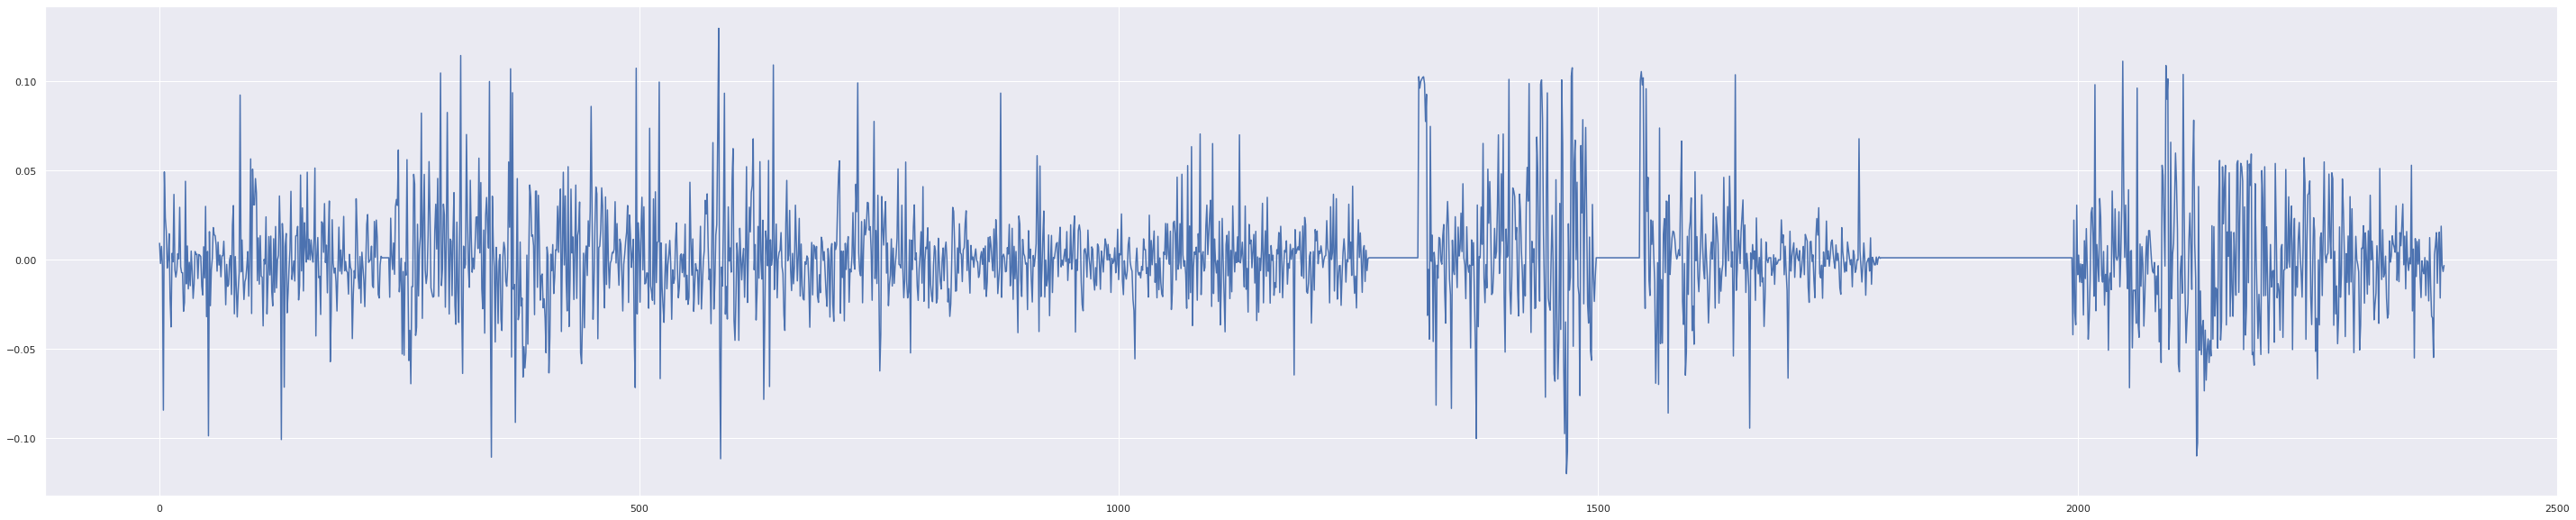

In [ ]:
x = data_all[data_all["ID_TARGET"]==96]
x.sort_values(by='ID_DAY')
nbr=238
fig= plt.figure(figsize=(50,10))
plt.plot(range(x.shape[0]),x.loc[:,"RET_{}".format(nbr)])

In [ ]:
indice_cor = pd.read_csv("indice_cor.csv")
indice_cor= list(indice_cor["0"])

indice_no_cor = pd.read_csv("indice_no_cor.csv")
indice_no_cor= list(indice_no_cor["0"])

In [ ]:
id = list(data_all["ID_TARGET"].unique())

score = []
model_dic = {}
col_dic = {}
model_id = 1
indice_cor= []
indice_no_cor= []
indice_cor_level = []

#param = {'max_depth': 10, 'eta': 1, 'objective': 'reg:squarederror','eval_metric':'rmse'}


# nombre de variables explicatives voulues
for indx,i in enumerate(id):
  if indx == -1:
    break
  """
  if i != 19:
    break
  """
  #N = np.random.randint(40,60)
  N=100
  
  if i in indice_cor :
    N=20

  #if i in indice_no_cor :
  #  N=50
  
  liquid_1 = data_all[data_all["ID_TARGET"]==i]
  liquid_1.dropna(axis=0,inplace=True)
  cor = liquid_1.drop(["ID_DAY","ID_TARGET","sign"],axis=1).corr()
  #features = liquid_1.drop(["ID_DAY","ID_TARGET","sign"],axis=1).columns
  #cov = pd.DataFrame(oas(liquid_1.drop(["ID_DAY","ID_TARGET","sign"],axis=1))[0], index=features, columns=features)
  #cor = cov / np.diag(cov)

  p = abs(cor["RET_TARGET"])
  ind = p.sort_values()
  ind = ind.index[ind.index != "RET_TARGET"][-N-1:-1]
  #if ind[-1] > 0.5:
    #indice_cor_level.append(i)
    #N=20
  #print(ind.index)
  #print(i)
  X_train,X_vali,y_train,y_vali = train_test_split(liquid_1.drop(["ID_DAY","ID_TARGET","sign","RET_TARGET"],axis=1),liquid_1["RET_TARGET"],random_state=8,test_size=0.2)
  #trans = PolynomialFeatures(degree=1)
  X_train = (X_train[ind])
  X_vali =  (X_vali[ind])

  #dtrain = xgb.DMatrix(X_train, label=y_train)
  #dvali = xgb.DMatrix(X_vali)
  #X_train = trans.fit_transform(X_train[ind.index[:]])
  #X_vali = trans.fit_transform(X_vali[ind.index[:]])
  #model =  LinearRegression()
  #model.fit(X_train[ind.index[:]],y_train)
  #X_train = liquid_1.drop(["ID_DAY","ID_TARGET","sign","RET_TARGET"],axis=1)
  #y_train = liquid_1["RET_TARGET"]

  if model_id == 1:
    model =  LinearRegression()
    model.fit(X_train,y_train)
    model_dic["model_{}".format(i)] = model
    col_dic["list_col_{}".format(i)] = ind
    pred = model.predict(X_vali)
    if weighted_accuracy(y_vali,np.sign(pred)) < 0.63 :
      indice_no_cor.append(i)
    if weighted_accuracy(y_vali,np.sign(pred)) > 0.80 :
      indice_cor.append(i)              
    score.append(weighted_accuracy(y_vali,np.sign(pred)))
  """
  if model_id == 2:
    model = Lasso(alpha=1)
    model.fit(X_train,y_train)
    model_dic["model_{}".format(i)] = model
    col_dic["list_col_{}".format(i)] = ind
    pred = model.predict(X_vali)
    score.append(weighted_accuracy(y_vali,np.sign(pred)))
  if model_id== 3:
    model = Sequential()
    model.add(Dense(60, input_dim=N, activation='relu'))
    model.add(Dense(60, activation='relu'))
    model.add(Dense(60, activation='relu'))
    model.add(Dense(1, activation='tanh'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=[weighted_accuracy])
    model.fit(X_train[ind.index[:]],y_train,epochs=20,verbose=False)
    model_dic["model_{}".format(i)] = model
    col_dic["list_col_{}".format(i)] = ind
    pred = model.predict(X_vali[ind.index[:]])
    score.append(weighted_accuracy(y_vali,np.sign(pred.ravel())))
  if model_id == 4:
    model = xgb.train(param, dtrain, 100)
    model_dic["model_{}".format(i)] = model
    col_dic["list_col_{}".format(i)] = ind
    pred = model.predict(dvali)
    if weighted_accuracy(y_vali,np.sign(pred)) > 0.75 :
      indice.append(i)  
    score.append(weighted_accuracy(y_vali,np.sign(pred)))
  """
pd.DataFrame(indice_cor).to_csv("indice_cor.csv")
pd.DataFrame(indice_no_cor).to_csv("indice_no_cor.csv")
np.mean(score)

0.7152207619442857

In [ ]:
indice_cor_level 

[]

In [ ]:
indice_cor

[272, 102]

In [ ]:
indice_no_cor

[139, 136, 3, 54, 96, 290, 145]

In [ ]:
indice_no_cor

[139, 136, 3, 54, 96, 290, 145]

In [ ]:
score = np.array(score)
score[score>0.80]

array([0.80560056, 0.81612453])

In [ ]:
X_test.fillna(0,inplace=True)

In [ ]:
list_test = list(X_test["ID_TARGET"])
pred = []
for indx,id in enumerate(list_test):
  if indx == -1:
    break
  va = X_test.iloc[indx]
  model = model_dic["model_{}".format(id)]
  col = col_dic["list_col_{}".format(id)].index[:]
  pred.append(np.sign(model.predict(pd.DataFrame(np.array(va[col]).reshape(1,-1))))[0])

In [ ]:
submission = pd.DataFrame(pred)
submission.columns = ["RET_TARGET"]
submission.index = X_test["ID"]
submission.to_csv("3submission_QRT.csv")
submission

### Modèle : 1 pour tous les asset liquid

In [ ]:
X_train,X_vali,y_train,y_vali = train_test_split(data_all.drop(["ID_DAY","sign","RET_TARGET"],axis=1),data_all["RET_TARGET"],random_state=293,test_size=0.2)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,random_state=29,test_size=0.5)

In [ ]:
print(" taille du jeu train : {}".format(X_train.shape[0]))
print(" taille du jeu test : {}".format(X_test.shape[0]))
print(" taille du jeu vali : {}".format(X_vali.shape[0]))

 taille du jeu train : 106840
 taille du jeu test : 106840
 taille du jeu vali : 53420


In [ ]:
model_reg =  LinearRegression()
model_reg.fit(X_train.drop(["ID_TARGET"],axis=1),y_train)

model_log = LogisticRegression()
model_log.fit(X_train.drop(["ID_TARGET"],axis=1),np.sign(y_train))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred_reg = model_reg.predict(X_vali.drop(["ID_TARGET"],axis=1))
a =np.sign(pred_reg)
print(weighted_accuracy(y_vali,np.sign(pred_reg)))

pred_log = model_log.predict(X_vali.drop(["ID_TARGET"],axis=1))
b =np.sign(pred_log)
print(weighted_accuracy(y_vali,pred_log))

0.6890457403812386
0.6823181133577176


In [ ]:
va_1 = model_reg.predict(X_test.drop(["ID_TARGET"],axis=1))
a =np.sign(va_1)
print(weighted_accuracy(y_test,np.sign(va_1)))

va_2 = model_log.predict(X_test.drop(["ID_TARGET"],axis=1))
b =np.sign(va_2)
print(weighted_accuracy(y_test,va_2))

0.6847805293044559
0.6774446666461805


In [ ]:
va_3= X_test["ID_TARGET"]
(a==b).sum()/X_test.shape[0]

0.8728846873830026

In [ ]:
va_1 = pd.DataFrame(va_1)
va_1.reset_index(drop=True,inplace=True)
va_2 = pd.DataFrame(va_2)
va_2.reset_index(drop=True,inplace=True)
va_3 = pd.DataFrame(va_3)
va_3.reset_index(drop=True,inplace=True)

va = pd.concat([va_1,va_2,va_3],axis=1)

In [ ]:
model_stack = RandomForestClassifier(max_depth=10,n_estimators=500)
model_stack.fit(va,np.sign(y_test))

model_stack2 = RandomForestRegressor(max_depth=10,n_estimators=500)
model_stack2.fit(va,y_test)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
pred_1 = model_reg.predict(X_vali.drop(["ID_TARGET"],axis=1))
pred_2 = model_log.predict(X_vali.drop(["ID_TARGET"],axis=1))
pred_3 = X_vali["ID_TARGET"]

In [ ]:
pred_1 = pd.DataFrame(pred_1)
pred_1.reset_index(drop=True,inplace=True)
pred_2 = pd.DataFrame(pred_2)
pred_2.reset_index(drop=True,inplace=True)
pred_3 = pd.DataFrame(pred_3)
pred_3.reset_index(drop=True,inplace=True)

pred = pd.concat([pred_1,pred_2,pred_3],axis=1)

In [ ]:
pred_stack = model_stack.predict(pred)
a =np.sign(pred_reg)
print(weighted_accuracy(y_vali,np.sign(pred_reg)))

pred_stack2 = model_stack2.predict(pred)
b =np.sign(pred_log)
print(weighted_accuracy(y_vali,pred_log))

0.6890457403812386
0.6823181133577176
